In [27]:
import numpy as np
from scipy import optimize
import random

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from chris import ExchangeEconomyClass

market = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1
## Basic Edgeworth box

In [49]:
kombinationer = market.paretoC()
print(f'{len(kombinationer)} out of {75*75} combinations satisfy C')

1543 out of 5625 combinations satisfy C


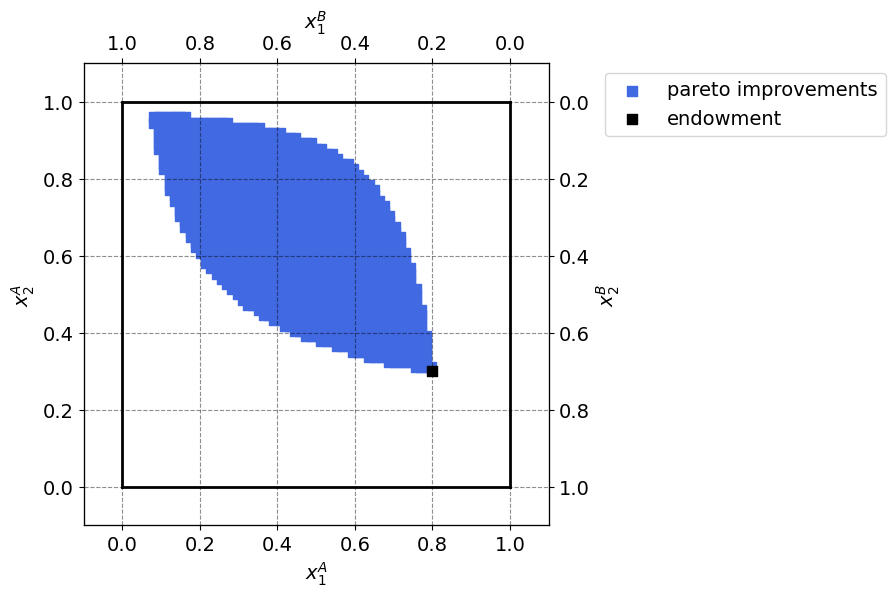

In [51]:
market.plot_edgeworth(market.par.w1A, market.par.w2A)

# Question 2
## Market error

In [4]:
# 1 Create price vector P_1 from 0.5 to 2.5
N = 75
P_1 = [0.5]

i = 1
while P_1[-1] < 2.5:
    P_1.append(0.5 + (2*i)/N)
    i += 1    

# 2 Calculate market clearing price from P_1
e1_best, e2_best, p1_best = market.market_clear(P_1)

print(f'Market clearing price = {p1_best:.4f}')

Market clearing price = 0.9533


In [52]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_error,
N=widgets.fixed(75),
p1=widgets.FloatSlider(min=0.25, max=2.5, step=0.01, value = 0.94),
)

interactive(children=(FloatSlider(value=0.94, description='p1', max=2.5, min=0.25, step=0.01), Output()), _dom…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Question 3
## Market clearing price

$
x_1^{A*} (p_1,\omega^A) + x_1^{B*}(p_1,\omega^B) = 1 \Leftrightarrow$

$\alpha \frac{p_1 w_1^A+w_2^A}{p_1} + \beta \frac{p_1 w_1^A+w_2^B}{p_1} = 1 \Leftrightarrow$

$p_1 (1-\alpha w_1^A-\beta w_1^B) = \alpha w_2^A+\beta w_2^B \Leftrightarrow$

$p_1^* = \frac{\alpha w_2^A+\beta w_2^B}{1-\alpha w_1^A-\beta w_1^B}$

In [6]:
par = market.par
p1_star = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)

print(f'Numerical market clearing price = {p1_best:.4f}')
print(f'Analytical market clearing price = {p1_star:.4f}\n')

market_eps_A = market.check_market_clearing(p1_best)
market_eps_B = market.check_market_clearing(p1_star)

print(f'Market error for numerical approach = {market_eps_A[0]:.5f}, {market_eps_A[1]:.5f}')
print(f'Market error for analytical approach= {market_eps_B[0]:.5f}, {market_eps_B[1]:.5f}')

Numerical market clearing price = 0.9533
Analytical market clearing price = 0.9444

Market error for numerical approach = -0.00559, 0.00533
Market error for analytical approach= 0.00000, 0.00000


# Question 4a
## Max utility_A in P_1

In [39]:
x1a_4a, x2a_4a, util_4a, p1_4a = market.A_sets_price(P_1)


print(f'A chooses the market price')
print(f'-----------------------------')
print(f'Consumption of good 1: {x1a_4a:.4f}')
print(f'Consumption of good 2: {x2a_4a:.4f}')
print(f'Utility of A: {util_4a:.4f}')
print(f'The optimal price: {p_4a:.3f}')

A chooses the market price
-----------------------------
Consumption of good 1: 0.6193
Consumption of good 2: 0.6409
Utility of A: 0.6336
The optimal price: 1.887


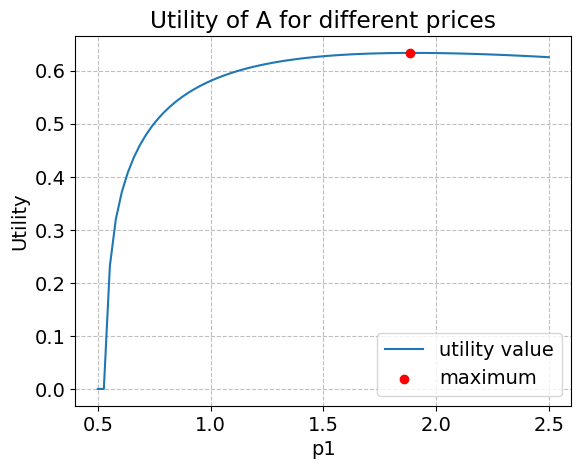

In [12]:
# Plot utility of A for different prices

market.plot_utility_A(P_1)

# Question 4b
## Max utility_A in p1 > 0

In [40]:
x1a_4b, x2a_4b, util_4b, p1_4b = market.A_sets_price_optimize()

In [42]:
# Compare with numerical optimization

print(f'Restricted price = {p1_4a:.3f}\nRestricted utility = {util_4a:.4f}\n')
print(f'Unrestricted price = {p1_4b:.3f}\nUnrestricted utility = {util_4b:.4f}\n')

diff = util_4b - util_4a

print(f'difference in utility = {diff:.6f}')

Restricted price = 1.887
Restricted utility = 0.6336

Unrestricted price = 1.897
Unrestricted utility = 0.6336

difference in utility = 0.000005


# Question 5a

In [74]:
x1a_5a, x2a_5a, util_5a = market.A_market_maker()

print(f'x1A = {x1a_5a:.4f}')
print(f'x2A = {x2a_5a:.4f}')
print(f'utility = {util_5a:.4f}')


x1A = 0.5811
x2A = 0.8378
utility = 0.7416


## Question 5B

In [75]:
x1a_5b, x2a_5b, util_5b = market.A_market_maker_optimize()

print(f'x1A_5B = {x1a_5b:.4f}')
print(f'x2A_5B = {x2a_5b:.4f}')
print(f'utility_5B = {util_5b:.4f}\n')
print(f'difference in utility = {util_5b - util_5a:.4f}')

x1A_5B = 0.5757
x2A_5B = 0.8444
utility_5B = 0.7432

difference in utility = 0.0016


## Question 6a

In [83]:
x1a_6a, x2a_6a, util_6a, util_6b = market.social_planner()

print(f'Optimal (x1a, x2a) = ({x1a_6a:.3f}, {x2a_6a:.3f})')
print(f'Optimal (x1b, x2b) = ({1-x1a_6a:.3f}, {1-x2a_6a:.3f})\n')

print(f'utility_A = {util_6a:.3f}')
print(f'utility_B = {util_6b:.3f}')
print(f'utility sum = {util_6a+util_6b:.3f}')


Optimal (x1a, x2a) = (0.333, 0.667)
Optimal (x1b, x2b) = (0.667, 0.333)

utility_A = 1.058
utility_B = 0.529
utility sum = 1.587


## Question 6B


In [ ]:
# Illustrate and compare with your results in euqstions 3)-6)

# 3: Market clearing allocation
# 4: consumer A chooses the price
# 5: consumer A chooses B's consumption, chooses Pareto point
# 6: Social planner chooses the optimal point

# a. illustrate the points in the Edgeworth box
# b. compare utilities for A and B

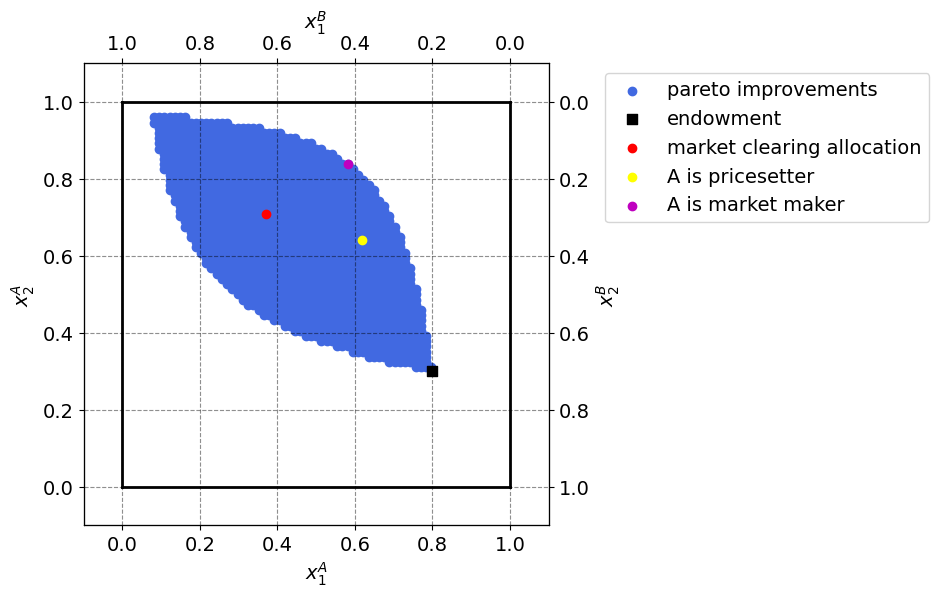

In [84]:
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
# Market clearing combination
market_clearing = market.demand_A(p1_best)

x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='royalblue',label='pareto improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s = 50)

# Allocations
ax_A.scatter(market_clearing[0],market_clearing[1], color = "red", label = "market clearing allocation")
ax_A.scatter(x1a_4a, x2a_4a, color = "yellow", label = "A is pricesetter")
ax_A.scatter(x1a_5a, x2a_5a, color = "m", label = "A is market maker")

# opg 8

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,bbox_to_anchor=(1.1,1.0));

# Lav widget

In [126]:
# Make a plot_edgeworth2 with the different points and interactive indifference curves?


# Question 7

In [137]:
from chris import W_float

np.random.seed(2024)

wlist = W_float()
print((wlist))

[(0.5880145188953979, 0.6991087476815825), (0.18815196003850598, 0.043808563746864815), (0.2050189523942888, 0.10606287447626572), (0.7272401436844548, 0.6794005235251416), (0.4738457034082185, 0.4482958244803046), (0.01910694787246603, 0.7525983372085793), (0.6024485390081266, 0.9617775753081896), (0.6643686473564756, 0.6066296193186763), (0.44915131493171645, 0.22535416319269552), (0.6701742968926956, 0.7357665924519133), (0.2579956380781936, 0.09554215386036546), (0.9609097422366777, 0.2517672867680111), (0.2821651194436432, 0.7682539346627851), (0.7979233971149834, 0.5440371984004161), (0.3827076306466419, 0.38165095020199724), (0.2858273884771829, 0.7402681531406573), (0.23898683243572905, 0.4377217046498637), (0.8835387027765857, 0.2892811403327177), (0.784506857087421, 0.7589536567735904), (0.4177853849344335, 0.225768767596083), (0.42009813893059855, 0.06436369088127136), (0.5964326869209966, 0.8373237223108303), (0.8924863863290551, 0.20052744388322685), (0.5023952343652898, 0

# Question 8

In [143]:
uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)


belongToC = market.counttupples(wlist)
print(len(belongToC))
print(belongToC)



15
[(0.5880145188953979, 0.6991087476815825), (0.4738457034082185, 0.4482958244803046), (0.6643686473564756, 0.6066296193186763), (0.6701742968926956, 0.7357665924519133), (0.2821651194436432, 0.7682539346627851), (0.2858273884771829, 0.7402681531406573), (0.25592093138827066, 0.8672323429662903), (0.5592137735196149, 0.6945129418277548), (0.5052305408491463, 0.8490037878830786), (0.29351563269757963, 0.6771195506548116), (0.42090640219720343, 0.6817127136293417), (0.49962258628095824, 0.3796649930632635), (0.5863586139898459, 0.4312106707158673), (0.39039811413050074, 0.635617323712327), (0.15922478762464465, 0.7116642159467059)]


In [149]:
from chris import market_equlibria

x1_eq, p1_eq = market_equlibria(belongToC)

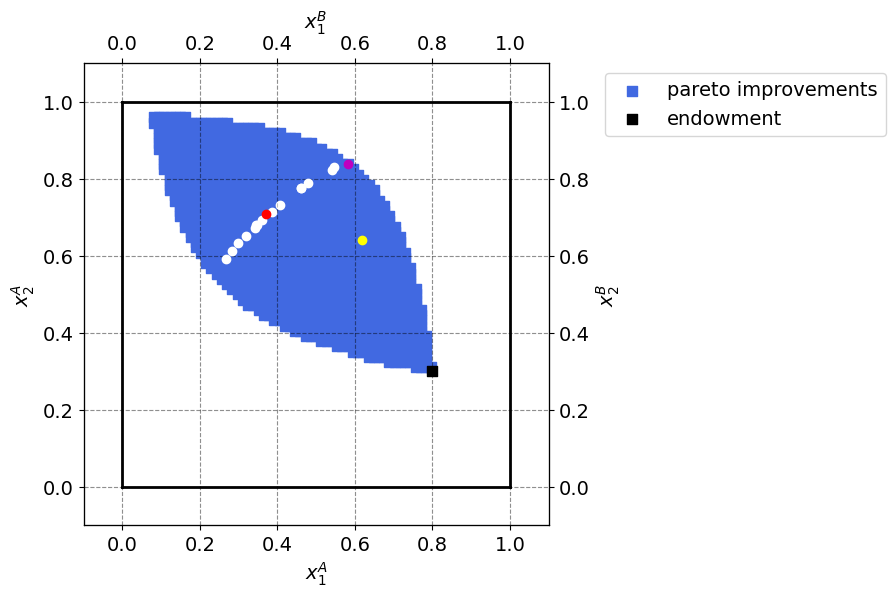

In [150]:
market.plot_edgeworth(market.par.w1A, market.par.w2A)
x1_8, x2_8 = zip(*x1_eq)
plt.scatter(x1_8,x2_8,marker='o',color='white',label='market equilibriums')
plt.scatter(market_clearing[0], market_clearing[1], color="red", label="market clearing allocation")
plt.scatter(x1a_4a, x2a_4a, color="yellow", label="A is pricesetter")
plt.scatter(x1a_5a, x2a_5a, color="m", label="A is market maker")

# Invert x and y axes
ax = plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()